<a href="https://colab.research.google.com/github/aldonat/SIB_BISA-AI-Academy/blob/main/Langkah%20Demi%20Langkah%20Panduan%20Praktis%20Analisis%20Sentimen/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pengumpulan Data

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nicapotato/womens-ecommerce-clothing-reviews

Dataset URL: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews
License(s): CC0-1.0
  0% 0.00/2.79M [00:00<?, ?B/s]
100% 2.79M/2.79M [00:00<00:00, 80.0MB/s]


In [ ]:
!unzip womens-ecommerce-clothing-reviews.zip -d '/content/drive/MyDrive/SIB - Bisa AI Academy/WEBINAR/Langkah demi Langkah : Panduan Praktik Analisis Sentiment dengan Python/Dataset'

Archive:  womens-ecommerce-clothing-reviews.zip
replace /content/drive/MyDrive/SIB - Bisa AI Academy/WEBINAR/Langkah demi Langkah : Panduan Praktik Analisis Sentiment dengan Python/Dataset/Womens Clothing E-Commerce Reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Library

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
data  = pd.read_csv('/content/drive/MyDrive/SIB - Bisa AI Academy/WEBINAR/Langkah demi Langkah : Panduan Praktik Analisis Sentiment dengan Python/Dataset/Womens Clothing E-Commerce Reviews.csv')
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
# Mengambil hanya kolom 'review' dan 'rating'
data = data[['Review Text', 'Rating']]
data

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5
...,...,...
23481,I was very happy to snag this dress at such a ...,5
23482,"It reminds me of maternity clothes. soft, stre...",3
23483,"This fit well, but the top was very see throug...",3
23484,I bought this dress for a wedding i have this ...,3


In [ ]:
data['Review Text'].duplicated().sum()

851

In [ ]:
data.isnull().sum()

Review Text    845
Rating           0
dtype: int64

In [ ]:
pd.reset_option('display.max_colwidth')

In [ ]:
data = data.dropna()
data = data.drop_duplicates()
data

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5
...,...,...
23481,I was very happy to snag this dress at such a ...,5
23482,"It reminds me of maternity clothes. soft, stre...",3
23483,"This fit well, but the top was very see throug...",3
23484,I bought this dress for a wedding i have this ...,3


In [ ]:
#Labeling
data['label'] = data['Rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

#Preprocessing

In [ ]:
# Fungsi untuk menghapus tanda baca
def clean_text(text):
    text = text.lower()  # Konversi ke huruf kecil
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    return text

In [ ]:
data['Review Text']=data['Review Text'].apply(clean_text)
data.head()

,Review Text,Rating,label
0,absolutely wonderful silky and sexy and comfo...,4,1
1,love this dress its sooo pretty i happened t...,5,1
2,i had such high hopes for this dress and reall...,3,0
3,i love love love this jumpsuit its fun flirty ...,5,1
4,this shirt is very flattering to all due to th...,5,1


#Tokenize

In [ ]:
def tokenize_text(text):
    return word_tokenize(text)

# Terapkan fungsi tokenisasi pada setiap elemen di kolom 'review_text'
data['Review Text'] = data['Review Text'].apply(tokenize_text)
data

,Review Text,Rating,label
0,"[absolutely, wonderful, silky, and, sexy, and,...",4,1
1,"[love, this, dress, its, sooo, pretty, i, happ...",5,1
2,"[i, had, such, high, hopes, for, this, dress, ...",3,0
3,"[i, love, love, love, this, jumpsuit, its, fun...",5,1
4,"[this, shirt, is, very, flattering, to, all, d...",5,1
...,...,...,...
23481,"[i, was, very, happy, to, snag, this, dress, a...",5,1
23482,"[it, reminds, me, of, maternity, clothes, soft...",3,0
23483,"[this, fit, well, but, the, top, was, very, se...",3,0
23484,"[i, bought, this, dress, for, a, wedding, i, h...",3,0


#Stopword Removal

In [ ]:
sw = stopwords.words('english')
# Fungsi untuk menghapus stopwords dari token-token kata
def remove_stopwords(tokens):
    filtered_tokens = [word for word in tokens if word.lower() not in sw]
    return filtered_tokens

# Menghapus stopwords dari kolom 'Tokenized Text'
data['Review Text'] = data['Review Text'].apply(remove_stopwords)
data

,Review Text,Rating,label
0,"[absolutely, wonderful, silky, sexy, comfortable]",4,1
1,"[love, dress, sooo, pretty, happened, find, st...",5,1
2,"[high, hopes, dress, really, wanted, work, ini...",3,0
3,"[love, love, love, jumpsuit, fun, flirty, fabu...",5,1
4,"[shirt, flattering, due, adjustable, front, ti...",5,1
...,...,...,...
23481,"[happy, snag, dress, great, price, easy, slip,...",5,1
23482,"[reminds, maternity, clothes, soft, stretchy, ...",3,0
23483,"[fit, well, top, see, never, would, worked, im...",3,0
23484,"[bought, dress, wedding, summer, cute, unfortu...",3,0


#Lematization

In [ ]:
sw = stopwords.words('english')
# Fungsi untuk menghapus stopwords dari token-token kata
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(sw)])

lemmatizer = nltk.stem.WordNetLemmatizer()
data['Review Text'] = data['Review Text'].apply(lambda x: lemmatize_text(x))
data.head()

,Review Text,Rating,label
0,absolutely wonderful silky sexy comfortable,4,1
1,love dress sooo pretty happened find store im ...,5,1
2,high hope dress really wanted work initially o...,3,0
3,love love love jumpsuit fun flirty fabulous ev...,5,1
4,shirt flattering due adjustable front tie perf...,5,1


In [ ]:
data

,Review Text,Rating,label
0,absolutely wonderful silky sexy comfortable,4,1
1,love dress sooo pretty happened find store im ...,5,1
2,high hope dress really wanted work initially o...,3,0
3,love love love jumpsuit fun flirty fabulous ev...,5,1
4,shirt flattering due adjustable front tie perf...,5,1
...,...,...,...
23481,happy snag dress great price easy slip flatter...,5,1
23482,reminds maternity clothes soft stretchy shiny ...,3,0
23483,fit well top see never would worked im glad ab...,3,0
23484,bought dress wedding summer cute unfortunately...,3,0


In [ ]:
data['Review Text'] = data['Review Text'].apply(lambda x: ' '.join(x))
data

,Review Text,Rating,label
0,absolutely wonderful silky sexy comfortable,4,1
1,love dress sooo pretty happened find store im ...,5,1
2,high hope dress really wanted work initially o...,3,0
3,love love love jumpsuit fun flirty fabulous ev...,5,1
4,shirt flattering due adjustable front tie perf...,5,1
...,...,...,...
23481,happy snag dress great price easy slip flatter...,5,1
23482,reminds maternity clothes soft stretchy shiny ...,3,0
23483,fit well top see never would worked im glad ab...,3,0
23484,bought dress wedding summer cute unfortunately...,3,0


#Pembuatan Model

In [ ]:
# Memisahkan data latih dan data uji
X = data['Review Text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15843,) (15843,)
(6791,) (6791,)


In [ ]:
# Mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [ ]:
# Melatih model
model = MultinomialNB()
model.fit(X_train_vectors, y_train)

MultinomialNB()

In [ ]:
# Memprediksi dan mengevaluasi model
y_pred = model.predict(X_test_vectors)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8777794139302018


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1521
           1       0.91      0.93      0.92      5270

    accuracy                           0.88      6791
   macro avg       0.83      0.81      0.82      6791
weighted avg       0.87      0.88      0.88      6791



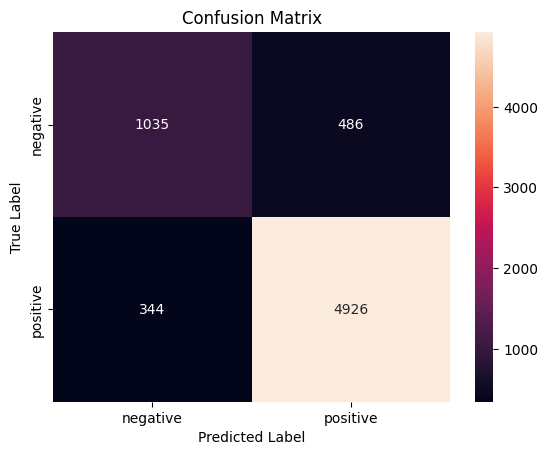

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
data = ["Bad", "Good", "I hate the service, it's really bad", "The nurse is so kind"]
vect = vectorizer.transform(data).toarray()

my_prediction = model.predict(vect)
print(my_prediction)

[0 1 0 1]


#Visualisasi

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
data_negative = data[(data['Rating']==1.0) | (data['Rating']==2.0) | (data['Rating']==3.0)]
data_positive = data[(data['Rating']==4.0) | (data['Rating']==5.0)]
#convert to list
negative_list=data_negative['Review Text'].tolist()
positive_list= data_positive['Review Text'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

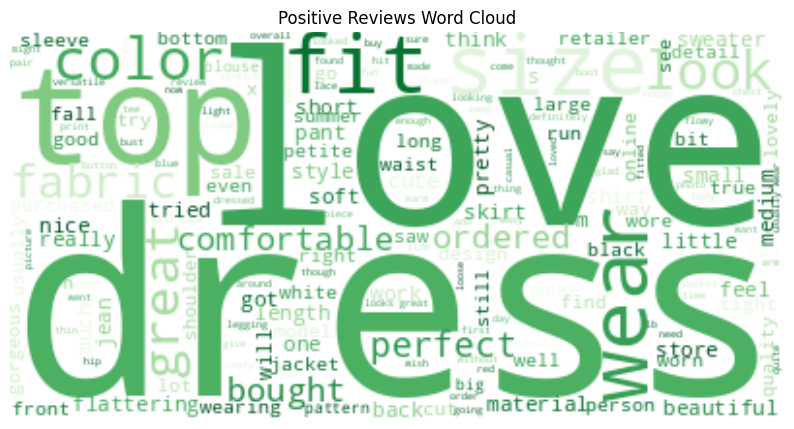

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()



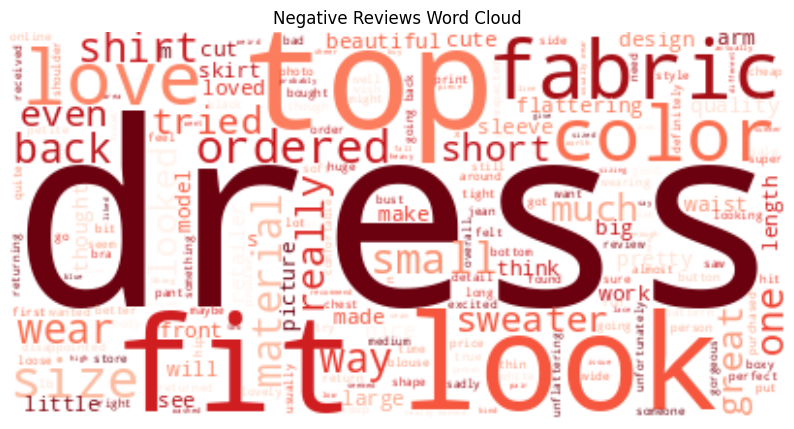

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

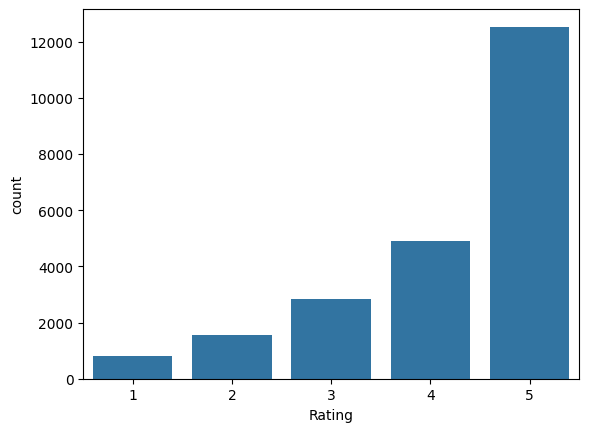

In [ ]:
import seaborn as sns
sns.countplot(x='Rating', data=data);

In [ ]:
data['Rating'].value_counts()

Rating
5    12534
4     4908
3     2823
2     1548
1      821
Name: count, dtype: int64

In [ ]:
import joblib

# Menyimpan model dan vectorizer
joblib.dump(model, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')